In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

# Wizualizacja grafów

## Podstawy
Do rysowania wykorzystuje się funkcje `nx.draw()`, która wywołuje funkcję `nx.draw_networkx()`. Z kolei `nx.draw_networkx()` wywołuje funkcje rysujące kolejno różne elementy grafu:
- `nx.draw_networkx_nodes()` - wierzchołki,
- `nx.draw_networkx_edges()` - krawędzie,
- `nx.draw_networkx_labels()` - etykiety wierzchołków,
- `nx.draw_networkx_edge_labels()` - etykiety krawędzi.

Można też wywołać te funkcje bezpośrednio.

In [3]:
edgelist_df = pd.DataFrame({
    "source": ["A", "A", "A", "B", "B", "C", "D", "E"],
    "target": ["B", "C", "D", "E", "F", "G", "H", "I"],
    "weight": [5, 2, 1, 2, 3, 5, 4, 1]
})
edgelist_df

source target  weight
0      A      B       5
1      A      C       2
2      A      D       1
3      B      E       2
4      B      F       3
5      C      G       5
6      D      H       4
7      E      I       1

In [4]:
nodes_values = dict(zip(["A", "B", "C", "D", "E", "F", "G", "H", "I"], [1, 2, 3, 4, 5, 6, 7, 8, 9]))
nodes_values

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9}

In [5]:
graph = nx.from_pandas_edgelist(edgelist_df, edge_attr=True)  # tworzenie grafu z listy krawędzi (są też inne metody)
nx.set_node_attributes(graph, nodes_values, "value")  # aktualizacja atrybutów wierzchołków

In [6]:
graph.nodes(data=True)

NodeDataView({'A': {'value': 1}, 'B': {'value': 2}, 'C': {'value': 3}, 'D': {'value': 4}, 'E': {'value': 5}, 'F': {'value': 6}, 'G': {'value': 7}, 'H': {'value': 8}, 'I': {'value': 9}})

In [7]:
graph.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 5}), ('A', 'C', {'weight': 2}), ('A', 'D', {'weight': 1}), ('B', 'E', {'weight': 2}), ('B', 'F', {'weight': 3}), ('C', 'G', {'weight': 5}), ('D', 'H', {'weight': 4}), ('E', 'I', {'weight': 1})])

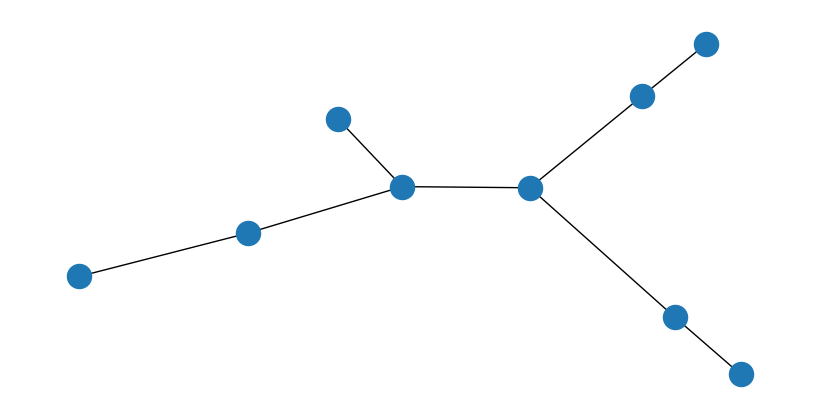

In [8]:
plt.figure(figsize=(8, 4))
nx.draw(graph)

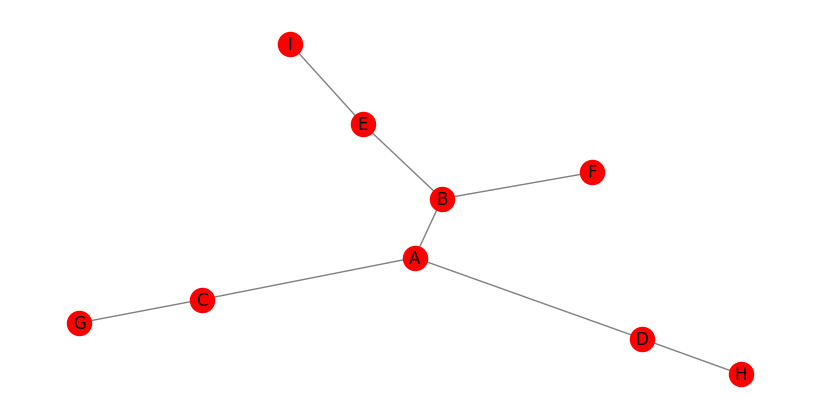

In [9]:
plt.figure(figsize=(8, 4))
nx.draw(graph, with_labels=True, node_color="red", edge_color="gray")

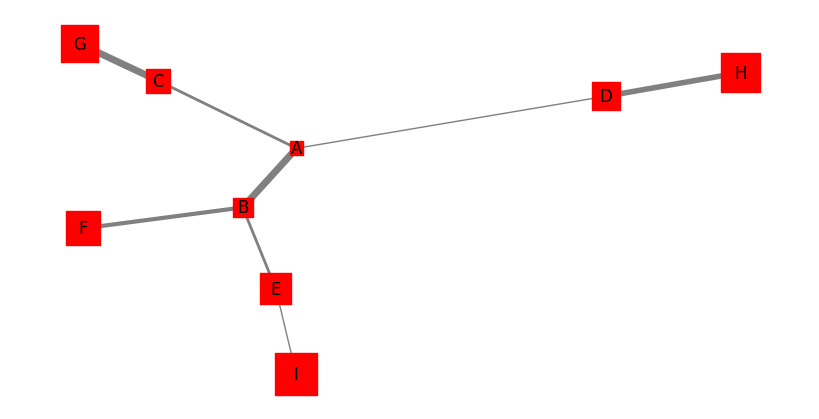

In [10]:
plt.figure(figsize=(8, 4))
nx.draw(
    graph,
    with_labels=True,
    node_color="red",
    node_shape="s",
    edge_color="gray",
    node_size=[v[1]["value"] * 100 for v in graph.nodes(data=True)],
    width=[e[2]["weight"] for e in graph.edges(data=True)],
)

## Pozycje wierzchołków - layout grafu 
Jest wiele sposobów na wyznaczenie pozycji wierzchołków grafu. W `networkx` dostępne są między innymi następujące metody:
- `nx.circular_layout()` - wierzchołki są rozmieszczone na okręgu,
- `nx.random_layout()` - wierzchołki są rozmieszczone losowo,
- `nx.spring_layout()` - wierzchołki są rozmieszczone zgodnie z algorytmem Fruchtermana-Reingolda (opartym na symulacji fizycznej) [**domyślny**], 
- `nx.spectral_layout()` - wierzchołki są rozmieszczone zgodnie z algorytmem bazującym na wektorach własnych Laplasjanu grafu (*graph Laplacian*),
- `nx.kamada_kawai_layout()` - wierzchołki są rozmieszczone zgodnie z algorytmem Kamady-Kawai (opartym na symulacji fizycznej).

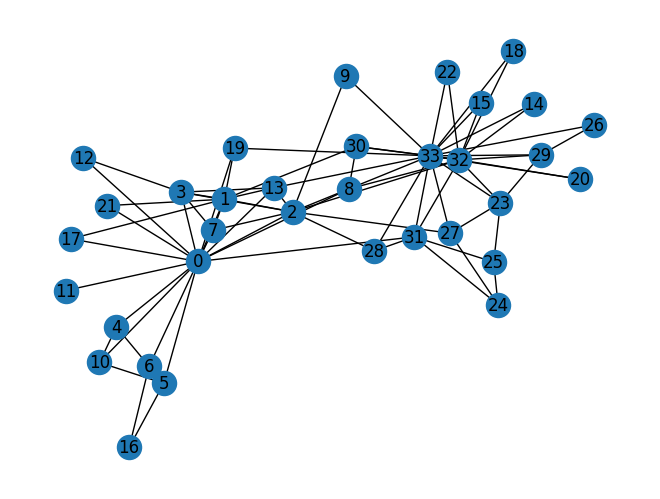

In [11]:
g = nx.karate_club_graph() # trochę większy graf
nx.draw(g, with_labels=True)

In [12]:
pos = nx.spring_layout(g, seed=42) # pozycje wierzchołków - losowe, ale ustalone ziarno
pos

{0: array([-0.1670207,  0.3310128]),
 1: array([-0.22275387,  0.15196481]),
 2: array([-0.09958155, -0.00201036]),
 3: array([-0.36261207,  0.16837812]),
 4: array([-0.07366463,  0.60933425]),
 5: array([-0.09783623,  0.752844  ]),
 6: array([-0.19081308,  0.74204817]),
 7: array([-0.33112232,  0.07250711]),
 8: array([-0.00303073, -0.10718615]),
 9: array([ 0.00625905, -0.55173946]),
 10: array([0.04102235, 0.68473876]),
 11: array([-0.46836883,  0.57789263]),
 12: array([-0.6316747 ,  0.24929505]),
 13: array([-0.15483125,  0.03822192]),
 14: array([ 0.30796044, -0.59526133]),
 15: array([-0.02556212, -0.4752388 ]),
 16: array([-0.13517926,  1.        ]),
 17: array([-0.34848122,  0.52627929]),
 18: array([ 0.28572748, -0.72636043]),
 19: array([0.04060899, 0.20040977]),
 20: array([ 0.11723678, -0.72079097]),
 21: array([-0.46509472,  0.35791132]),
 22: array([-0.07403563, -0.60311449]),
 23: array([ 0.34127717, -0.30745884]),
 24: array([ 0.5803668 , -0.10122772]),
 25: array([ 0.4

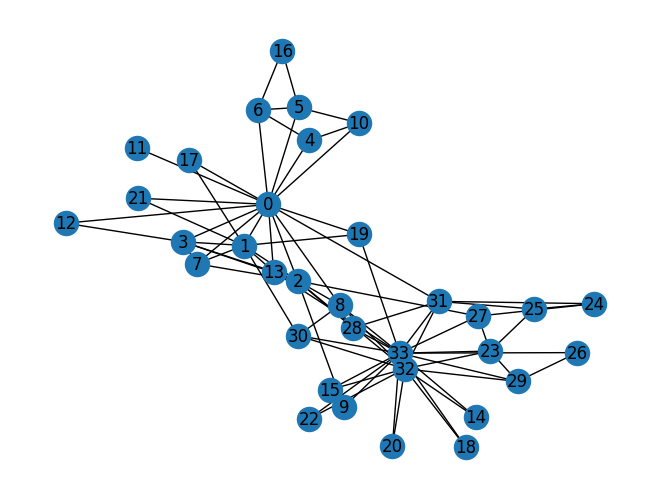

In [13]:
nx.draw(g, pos=pos, with_labels=True)

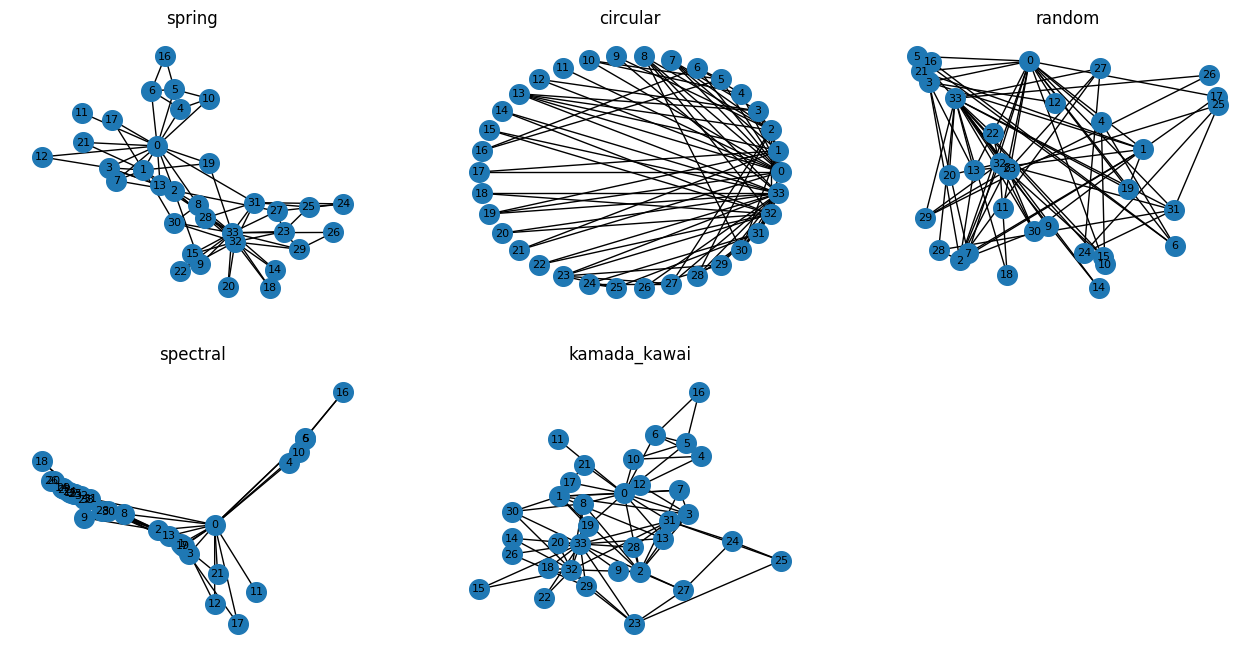

In [14]:
positions = {
    "spring": nx.spring_layout(g, seed=42, ),
    "circular": nx.circular_layout(g),
    "random": nx.random_layout(g, seed=42),
    "spectral": nx.spectral_layout(g),
    "kamada_kawai": nx.kamada_kawai_layout(g),
}

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.flatten()
for i, (name, pos) in enumerate(positions.items()):
    axs[i].set_title(name)
    nx.draw(g, pos=pos, with_labels=True, node_size=200, font_size=8, ax=axs[i])

axs[5].set_visible(False)  # żeby nie było pustego wykresu

## Tworzenie legendy 
Niestety legendy nie da się zrobić w łatwy sposób.

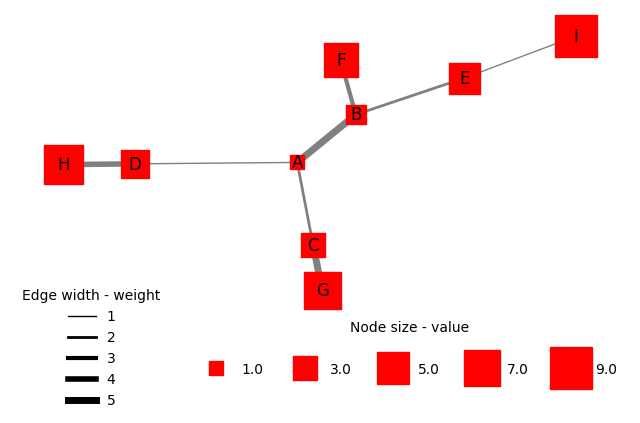

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
nx.draw(
    graph,
    pos=nx.spring_layout(graph, seed=42),
    with_labels=True,
    node_color="red",
    node_shape="s",
    edge_color="gray",
    node_size=[v[1]["value"] * 100 for v in graph.nodes(data=True)],
    width=[e[2]["weight"] for e in graph.edges(data=True)],
    ax=ax,
)

# dodawanie kilku legend - hacki ze StackOverflow
node_sizes = [v[1]["value"] for v in graph.nodes(data=True)]
for v in np.quantile(node_sizes, np.linspace(0, 1, 5)):
    ax.plot([], [], "rs", markersize=np.sqrt(v * 100), label=v)
first_legend = ax.legend(
    labelspacing=2, title="Node size - value", frameon=False, ncol=5, loc="center right", bbox_to_anchor=(1, -0.1)
)
ax.add_artist(first_legend)

edge_sizes = [e[2]["weight"] for e in graph.edges(data=True)]
ax.legend(
    handles=[mpl.lines.Line2D([], [], color="k", linewidth=e) for e in np.unique(edge_sizes)],
    labels=list(np.unique(edge_sizes)),
    loc = "center left", 
    bbox_to_anchor=(0, -0.1),
    frameon=False,
    title="Edge width - weight",
)
plt.show()

## Przykład wizualizacji większego grafu

In [16]:
got_s1_edges = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-edges.csv")
got_s1_edges.head()

Source  Target  Weight  Season
0           NED  ROBERT     192       1
1      DAENERYS   JORAH     154       1
2           JON     SAM     121       1
3  LITTLEFINGER     NED     107       1
4           NED   VARYS      96       1

In [17]:
got_s1_nodes = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-nodes.csv")
got_s1_nodes.head()

Id     Label
0  ADDAM_MARBRAND     Addam
1           AEGON     Aegon
2           AERYS     Aerys
3  ALLISER_THORNE  Allister
4            ARYA      Arya

In [18]:
got_graph = nx.from_pandas_edgelist(got_s1_edges, "Source", "Target", edge_attr="Weight")

In [19]:
node_labels_dict = got_s1_nodes.set_index("Id")["Label"].to_dict()
nx.relabel_nodes(got_graph, node_labels_dict, copy=False) # zmiana nazw wierzchołków na podstawie słownika 

In [20]:
# do ustalenia szerokości krawędzi
weights = np.array([e[2]["Weight"] for e in got_graph.edges(data=True)])
max_weight = np.max(weights)

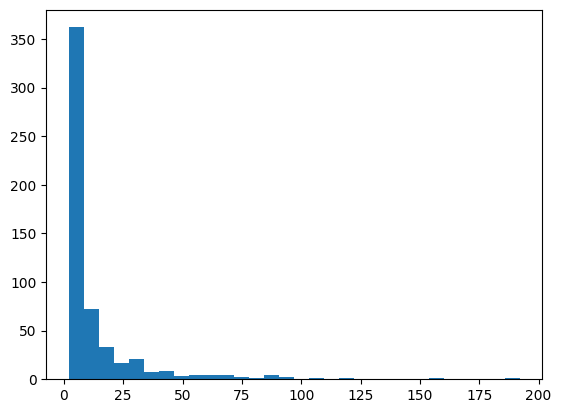

In [21]:
plt.hist(weights, bins=30) # pomocniczy wykres do ustalenia legendy szerokości krawędzi
plt.show()

In [22]:
# do ustalenia wielkości wierzchołków
node_degree = dict(got_graph.degree(weight = "Weight"))
node_size = np.array([node_degree[n] for n in got_graph.nodes()])

In [23]:
pos = nx.kamada_kawai_layout(got_graph)

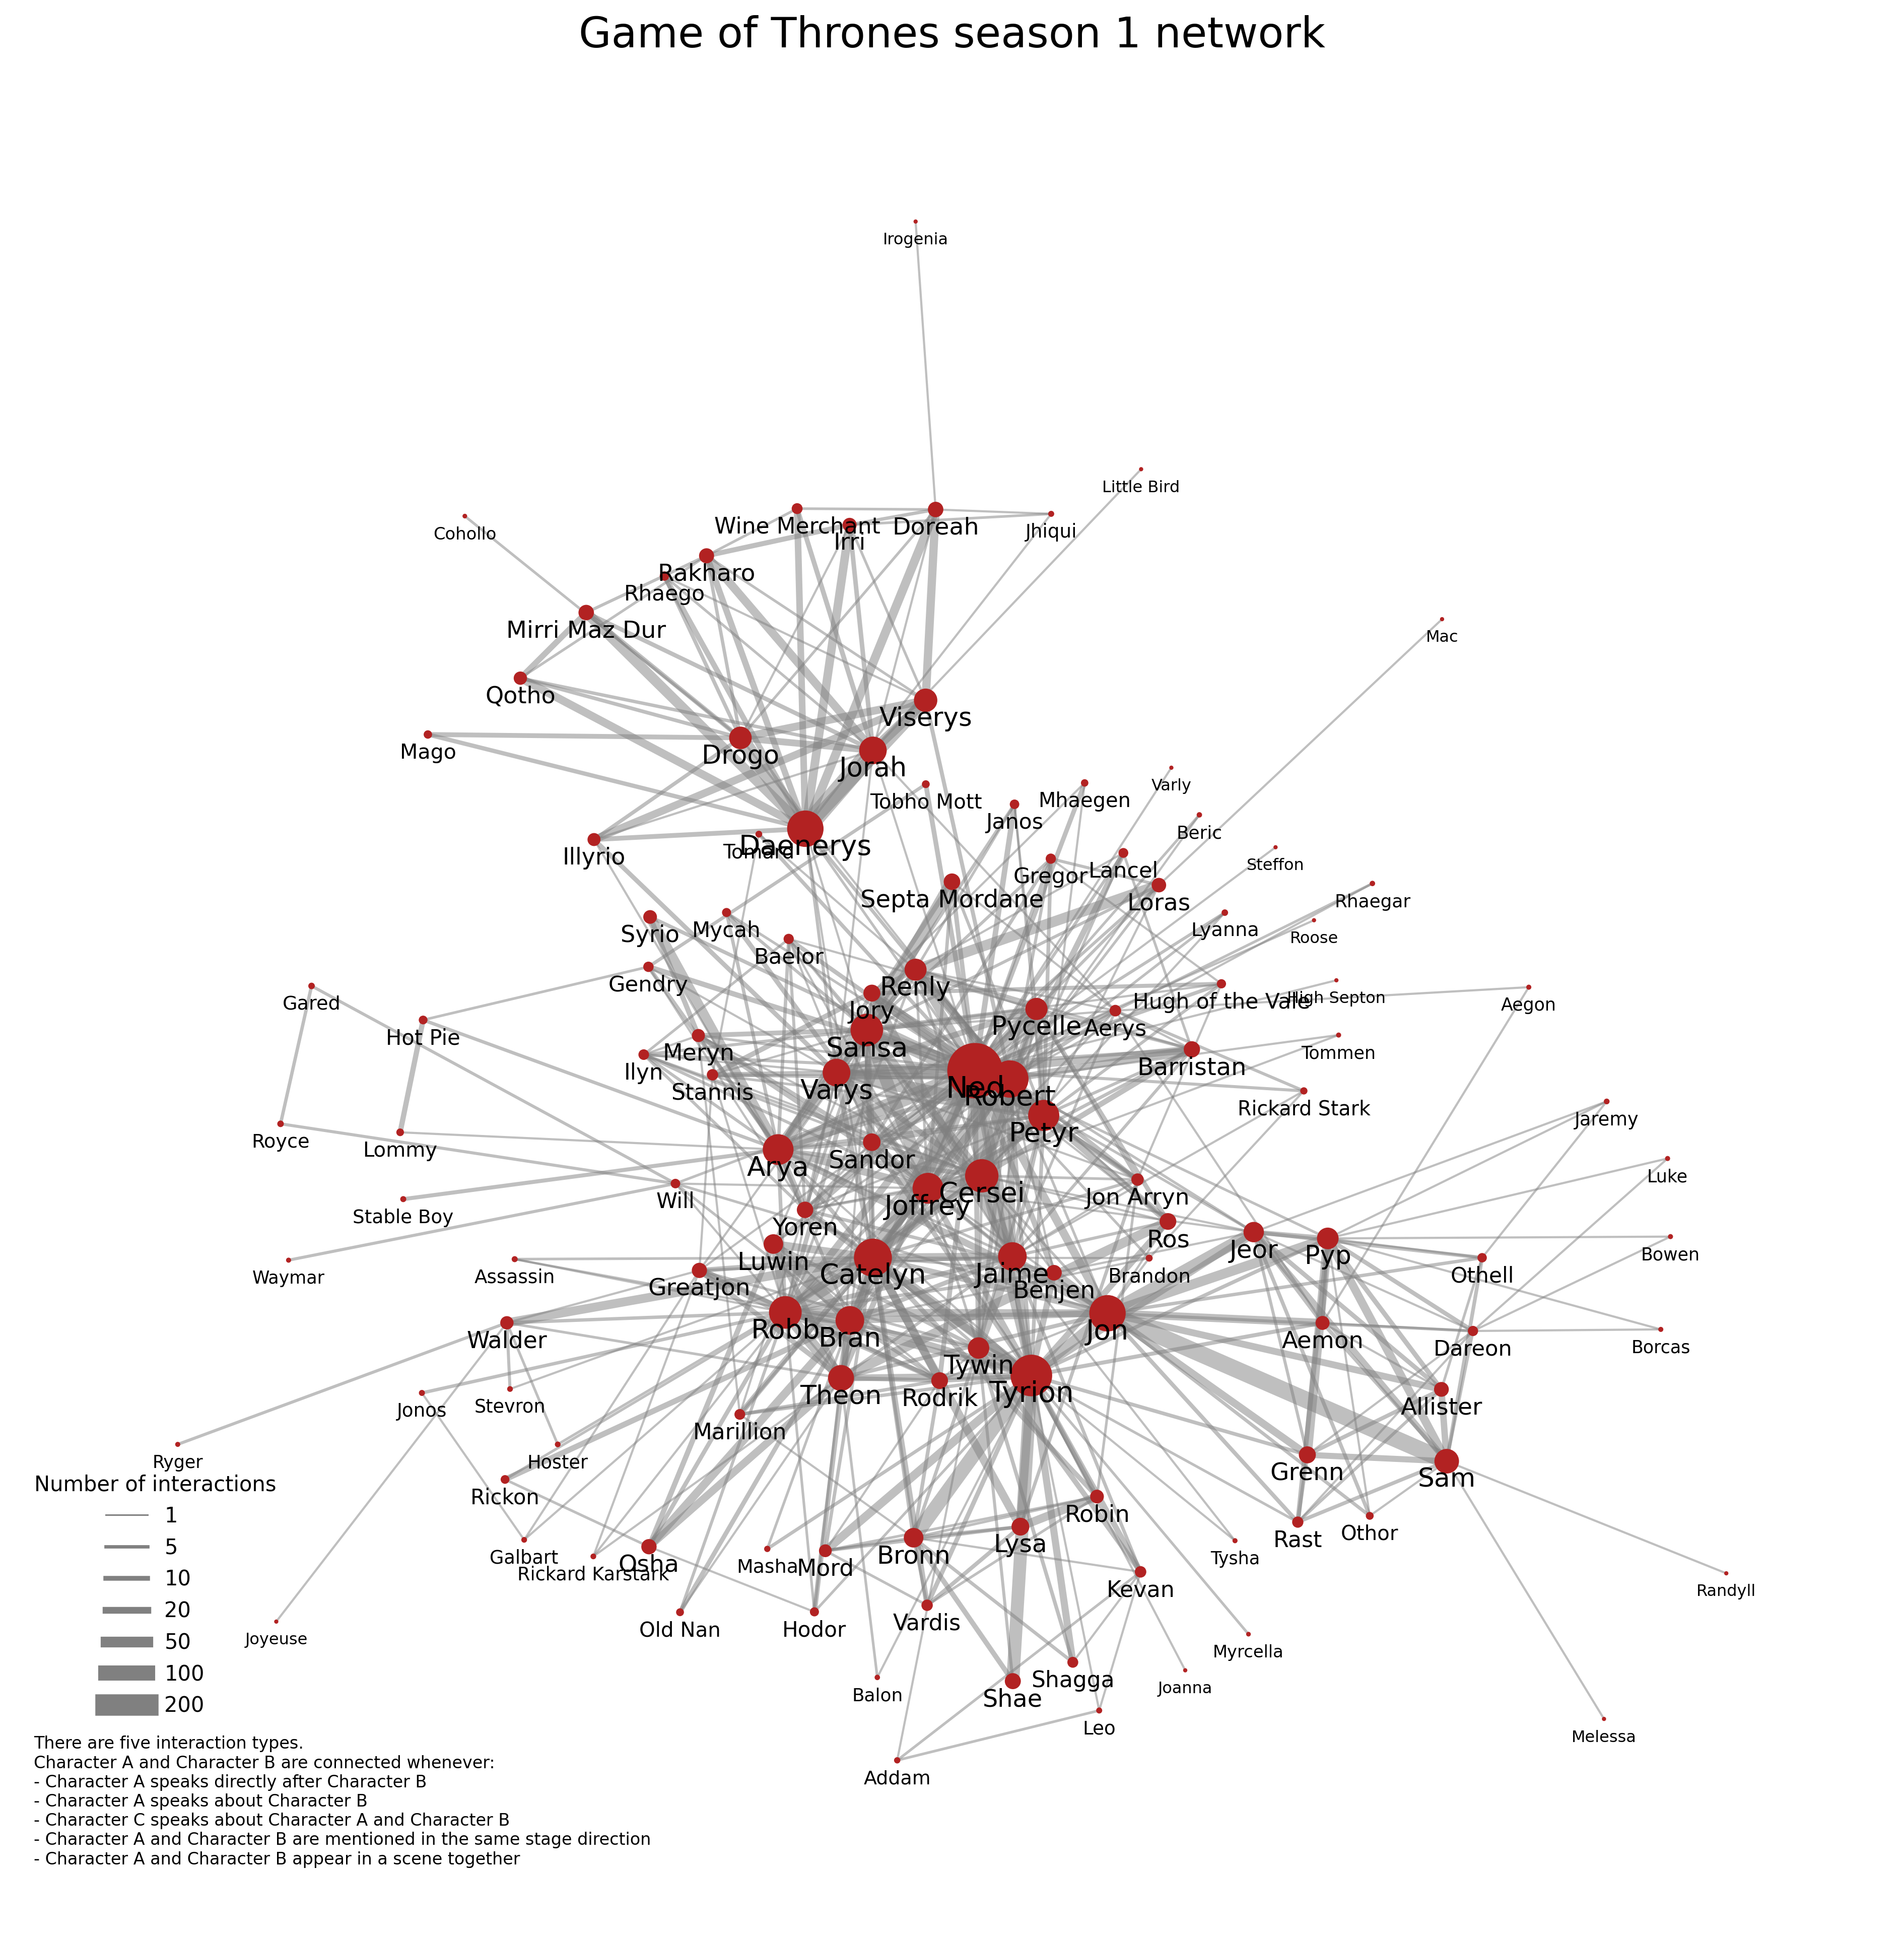

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)

# rysowanie warstwowo w celu lepszej kontroli (np. różny poziom przezroczystości)
ax.set_title("Game of Thrones season 1 network", fontsize=20)

nx.draw_networkx_nodes(got_graph, 
    pos=pos, 
    node_color="firebrick", 
    node_size=node_size/2, 
    ax=ax
)

nx.draw_networkx_edges(
    got_graph,
    pos=pos,
    width=np.sqrt(weights / max_weight) * 10,
    edge_color="gray",
    alpha=0.5, # półprzezroczyste krawędzie
    ax=ax,
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y - 0.02, node, fontsize=7 + np.log(node_size[i]), ha="center", va="center")

for w in [1, 5, 10, 20, 50, 100, 200]:
    ax.plot([], [], "gray", linewidth=np.sqrt(w) / np.sqrt(max_weight) * 10, label=w)
ax.legend(title="Number of interactions", frameon=False, bbox_to_anchor=(0, 0.1), loc = "lower left")
ax.text(0.01, 0.1, 
"""There are five interaction types. 
Character A and Character B are connected whenever:
- Character A speaks directly after Character B
- Character A speaks about Character B
- Character C speaks about Character A and Character B
- Character A and Character B are mentioned in the same stage direction
- Character A and Character B appear in a scene together""", 
    fontsize=8, 
    transform=ax.transAxes,
    verticalalignment="top" ) # określamy bezwzględne współrzędne tekstu
plt.axis("off")
plt.show()

## Inny pakiet do wizualizacji grafów - `netgraph`
https://netgraph.readthedocs.io/en/latest/index.html 

Niestety w wielu sytuacjach działa dość wolno, ale warto zobaczyć przykłady, np.: https://python-graph-gallery.com/500-network-chart-with-edge-bundling/. 

# `matplotlib` - poziom zaawansowany

## Konfiguracja `matplotlib`

**Jak dostosować właściwości i domyślny wygląd wykresów?**
- ustawiając `rcParams` (*runtime configuration parameters*),
- używając predefiniowanych stylów,
- tworząc/modyfikując plik `matplotlibrc` (*matplotlib runtime configuration*).

**Po co to robić?** 

- dla spójnego i jednolitego wyglądu wykresów:
    - w projekcie (raport, prezentacja, praca dyplomowa, ...),
    - w firmie (np. z wykorzystaniem szablonów, w zgodzie z identyfikacją wizualną);
- dla skrócenia czasu tworzenia wykresów i kodu potrzebnego do ich modyfikacji. 


### edytowanie `rcParams`

In [25]:
mpl.rcParams # słownik z aktualnymi ustawieniami

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

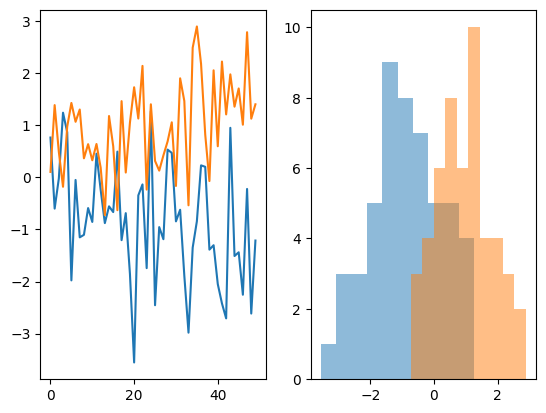

In [26]:
# domyślny wykres
np.random.seed(0)
data1 = np.random.normal(loc=-1, size=50)
data2 = np.random.normal(loc=1, size=50)

def example_plot():
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(data1)
    axs[0].plot(data2)
    axs[1].hist(data1, alpha=0.5)
    axs[1].hist(data2, alpha=0.5)
    plt.show()

example_plot()

#### zmiana domyślnego rozmiaru wykresu i czcionki
(często przydatne do raportu lub prezentacji)

In [27]:
print(mpl.rcParams["figure.figsize"])
print(mpl.rcParams["font.size"])

[6.4, 4.8]
10.0


In [28]:
mpl.rcParams["figure.figsize"] = (12, 6)
mpl.rcParams["font.size"] = 15

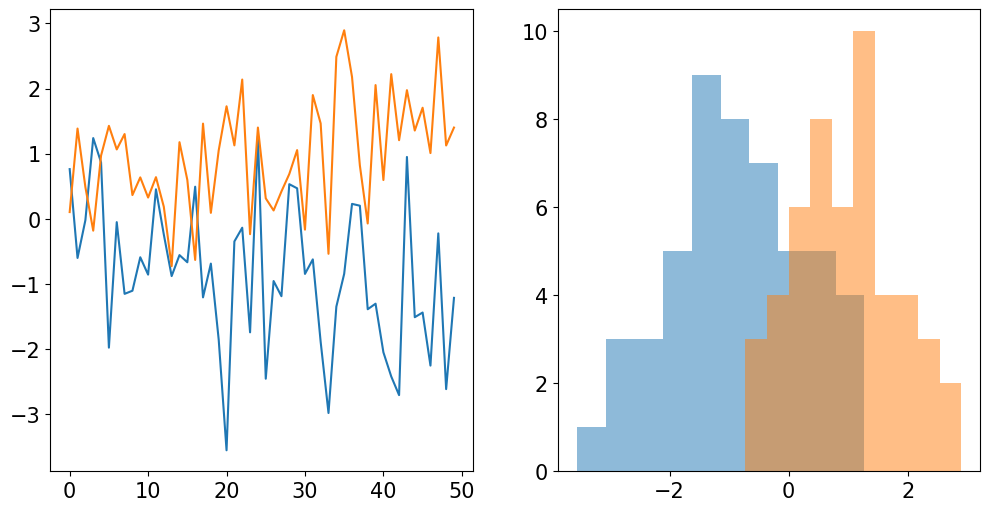

In [29]:
example_plot()

#### zmiana sekwencji kolorów 

In [30]:
mpl.rcParams["axes.prop_cycle"] # domyślny cykl kolorów

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

In [31]:
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=["darkviolet", "forestgreen"]) # interesująca nas paleta kolorów

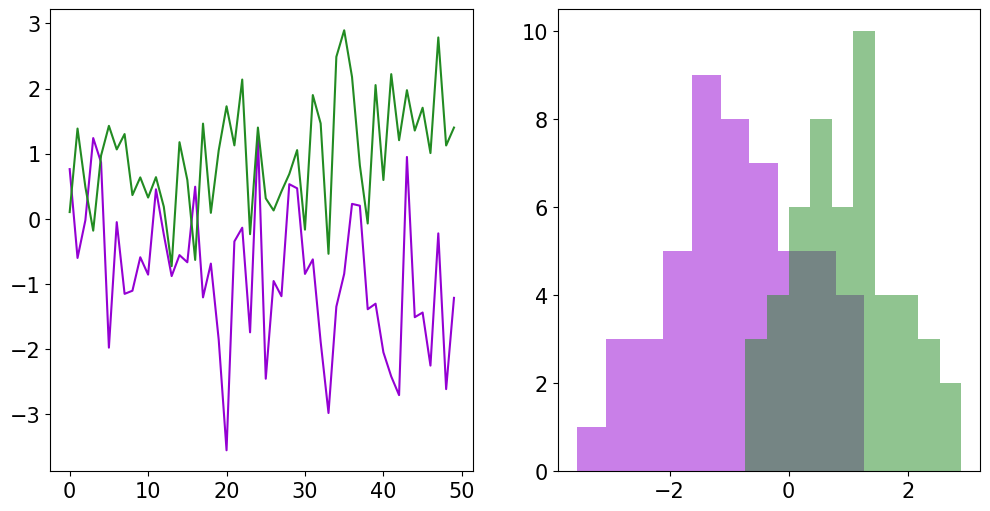

In [32]:
# wykres z nowymi ustawieniami
example_plot()

#### zmiana stylu konkretnej grupy elementów 
np. linii, markerów, siatki, ...

In [33]:
# linie
mpl.rcParams["lines.linewidth"] = 4
mpl.rcParams["lines.linestyle"] = "--"

# biny histogramu
mpl.rcParams["hist.bins"] = 6

# słupki (patch)
mpl.rcParams["patch.force_edgecolor"] = True  

# siatka na wykresie
mpl.rcParams["axes.grid"] = True  # żeby była siatka na wykresie
mpl.rcParams["axes.axisbelow"] = True  # żeby siatka była pod wykresem (domyślnie jest tylko pod liniami, ale nie pod punktami/słupkami)

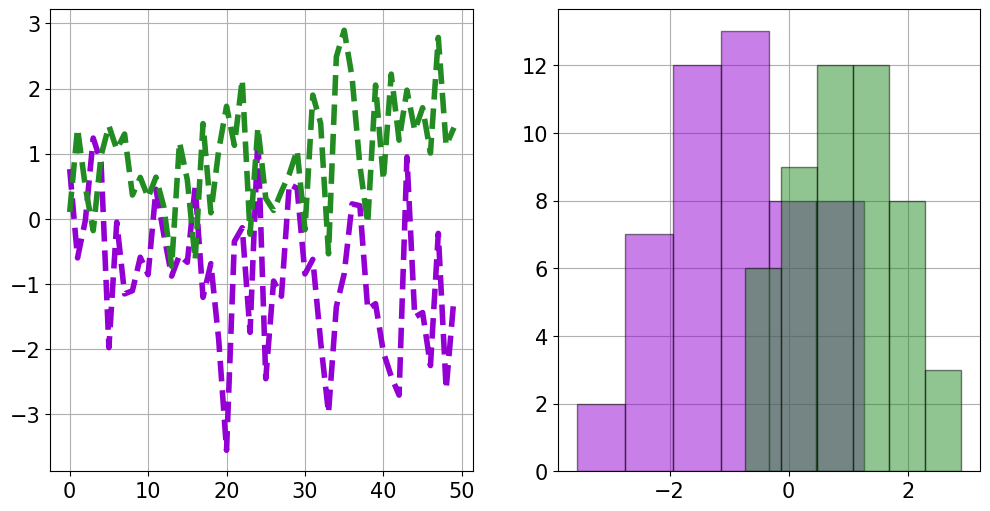

In [34]:
# wykres z nowymi ustawieniami
example_plot()

In [35]:
# parametry w obrębie jednej grupy można też zmieniać tak:
mpl.rc("lines", linewidth=1, linestyle="-.")

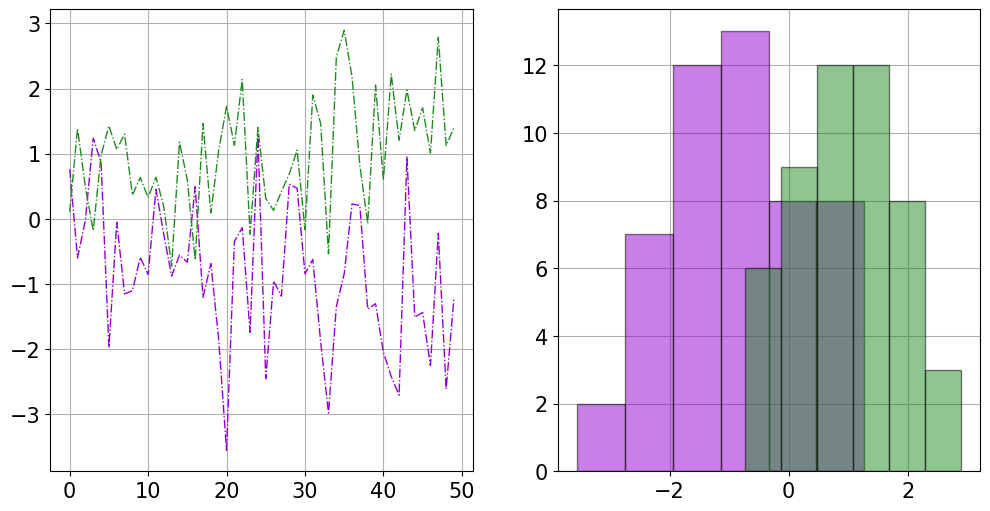

In [36]:
example_plot()

#### powrót do domyślnych ustawień

In [37]:
plt.rcdefaults()

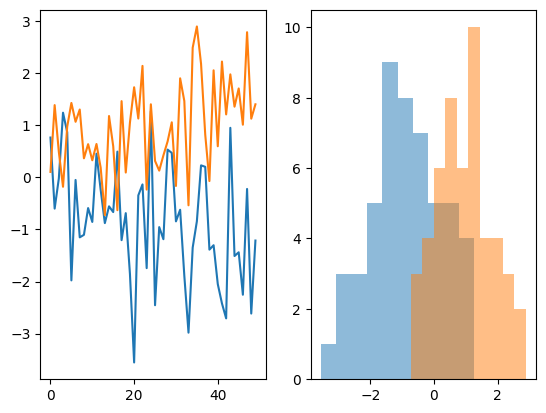

In [38]:
example_plot()

### gotowe style
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [39]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [40]:
plt.style.use("ggplot")

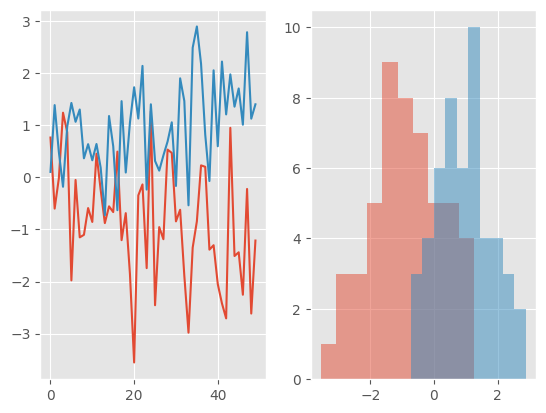

In [41]:
example_plot()

In [42]:
plt.style.use("dark_background")

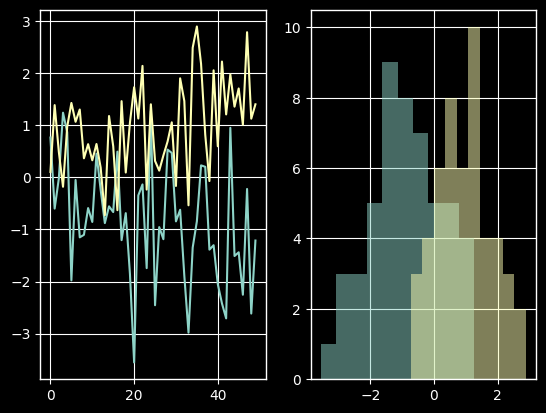

In [43]:
example_plot()

In [44]:
plt.rcdefaults()

## `matplotlib` - przydatne wskazówki

![](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)

### złożone, dwuwymiarowe `subplots`
- spłaszczenie `axes` - `ax.flatten()`
- `plt.tight_layout()` w przypadku problemów z nachodzeniem się elementów
- `ax.set_facecolor()` w celu wyróżnienia jednego z wykresów

In [45]:
mu = np.linspace(-4, 4, 9)
mu 

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

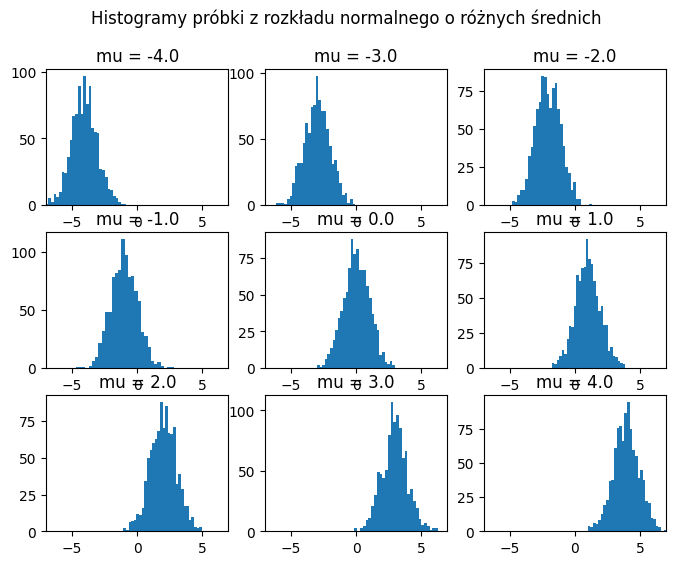

In [46]:
# przed
fig, axs = plt.subplots(3, 3, figsize=(8, 6))
for i in range(3):
    for j in range(3):
        index = 3*i + j # :( 
        axs[i, j].hist(np.random.normal(loc=mu[index], size=1000), bins=30)
        axs[i, j].set_xlim(-7, 7)
        axs[i, j].set_title(f"mu = {mu[index]}")
plt.suptitle("Histogramy próbki z rozkładu normalnego o różnych średnich")
plt.show()

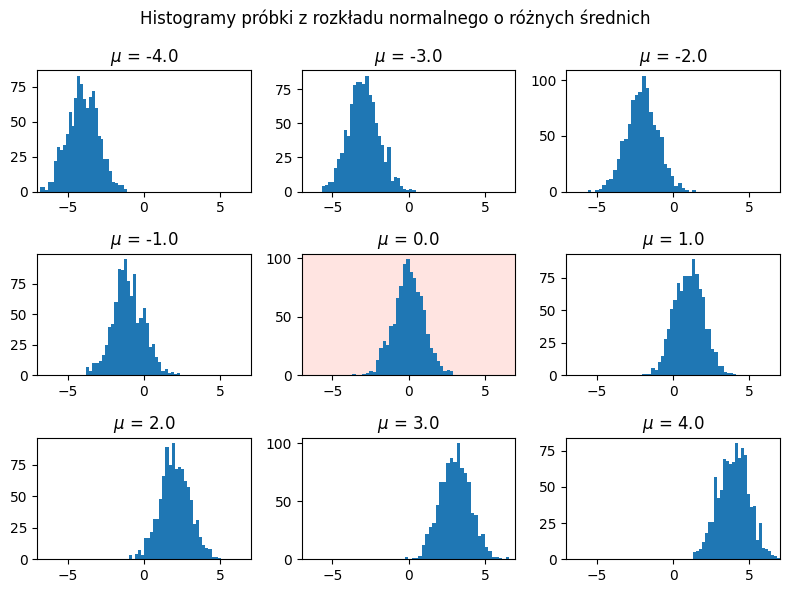

In [47]:
# po
fig, axs = plt.subplots(3, 3, figsize=(8, 6))
axs = axs.flatten()  # żeby nie trzeba było odwoływać się do dwuwymiarowej tablicy
for i in range(len(axs)):
    axs[i].hist(np.random.normal(loc=mu[i], size=1000), bins=30)
    axs[i].set_xlim(-7, 7)
    axs[i].set_title(f"$\mu$ = {mu[i]}") # użycie TeXa
axs[4].set_facecolor("mistyrose")  # zmiana koloru tła
plt.suptitle("Histogramy próbki z rozkładu normalnego o różnych średnich")
plt.tight_layout()  # żeby się nie nakładały
plt.show()

### dodawanie anotacji, edycja podpisów osi, ... 

In [48]:
x = np.linspace(0, 12 * np.pi, 1000)
y = np.sin(x)

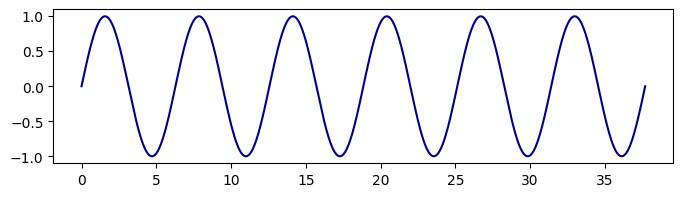

In [49]:
# podstawowy wykres
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax.plot(x, y, color="darkblue")
plt.show()

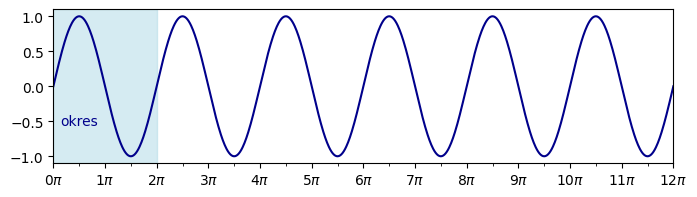

In [50]:
# poprawiony wykres
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax.plot(x, y, color="darkblue")

# zacieniowanie obszaru, dodanie anotacji
ax.fill_betweenx([-1.1, 1.1], 0, 2 * np.pi, alpha=0.5, color="lightblue")
ax.text(np.pi / 2, -0.5, "okres", ha="center", va="center", color="darkblue")

# usunięcie białych marginesów przez zmianę granic osi
ax.set_xlim(0, 12 * np.pi)
ax.set_ylim(-1.1, 1.1)

# poprawa podpisów na osi x
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=np.pi))  # ustawienie podziałki co pi
ax.xaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda val, pos: f"${val / np.pi:.0f}\pi$")
)  # użycie TeXa do wyświetlania symbolu pi
# matplotlib.ticker.FuncFormatter -- funkcja powinna przyjmować wartość i pozycję, a zwracać stringa do wyświetlenia
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(n=2))  # podziałka co pi/2

plt.show()

### zapisywanie wykresów do pliku

**Przydatne argumenty:**
- `dpi` - dots per inch (rozdzielczość)
- `bbox_inches` - określa obszar, który ma być zapisany do pliku
- `transparent` - czy tło ma być przezroczyste


**O formatach:**
- Do raportów (w szczególności robionych w LaTeX-u) najlepiej zapisywać wykresy jako grafikę wektorową (np. `pdf` lub `svg`). Można wtedy wykorzystać np. Inkscape do dalszej edycji. 
- Jeśli konieczny jest format rastrowy, to lepiej użyć `png` niż `jpg` (lepsza jakość, wspiera przezroczystość).
- Do raportów w LaTeX-u można też użyć `pgf` (grafiki wektorowe z kodu) - wtedy wykresy są generowane przez LaTeX-a. Wymaga to zainstalowania dodatkowych pakietów, ale pozwala na zachowanie spójności czcionek i wyglądu wykresów z tekstem w dokumencie, a także na wykorzystanie na figurach LaTeX-owych poleceń (np. referencji do innego obiektu w dokumencie).

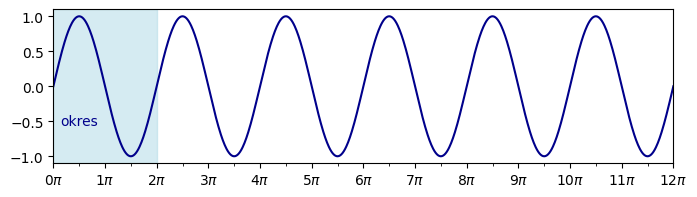

In [51]:
fig

In [52]:
fig.savefig("wykres1.png") 

In [53]:
fig.savefig("wykres2.png", dpi=500, bbox_inches="tight") 

In [54]:
fig.savefig("wykres3.png", dpi=500, bbox_inches="tight", transparent=True)

In [55]:
fig.savefig("wykres.pdf", bbox_inches="tight") # zapis do PDFa - grafika wektorowa

In [57]:
fig.savefig("wykres.pdf", bbox_inches="tight") # zapis do PGF